In [1]:
import torch

hessian_sample = torch.load('/home/aiscuser/yangwang/Hessians-Llama_32-11B-Vision-Instruct/language_model.model.layers.0.mlp.down_proj.pt')
inv_hessian_sample = torch.load('/home/aiscuser/yangwang/InvHessians-Llama_32-11B-Vision-Instruct/language_model.model.layers.0.mlp.down_proj.pt')  

def flat_to_sym(V, N):
    A = torch.zeros(N, N, dtype=V.dtype, device=V.device)
    idxs = torch.tril_indices(N, N, device=V.device)
    A[idxs.unbind()] = V
    A[idxs[1, :], idxs[0, :]] = V
    return A

H = flat_to_sym(hessian_sample['flatH'], hessian_sample['n'])
I = flat_to_sym(inv_hessian_sample['invH'], inv_hessian_sample['n'])


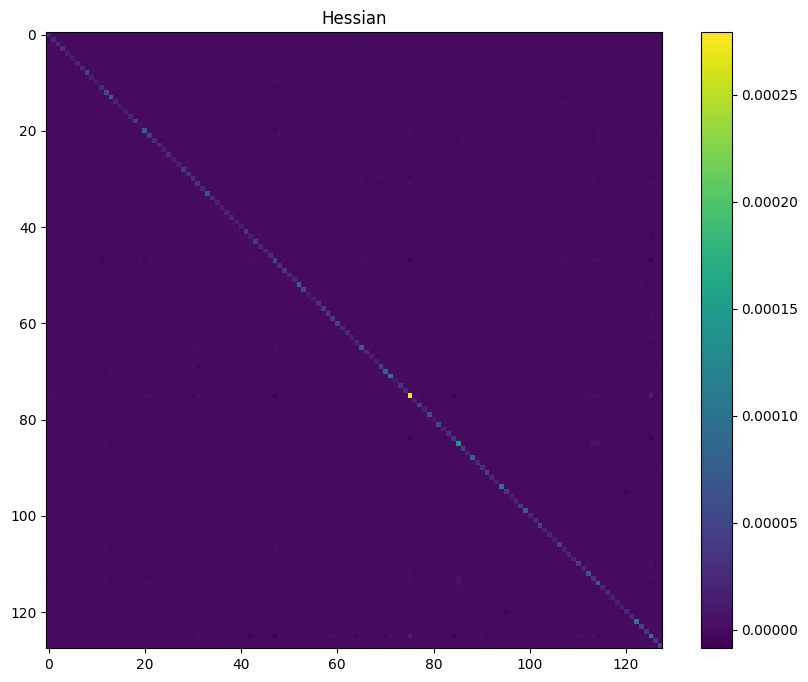

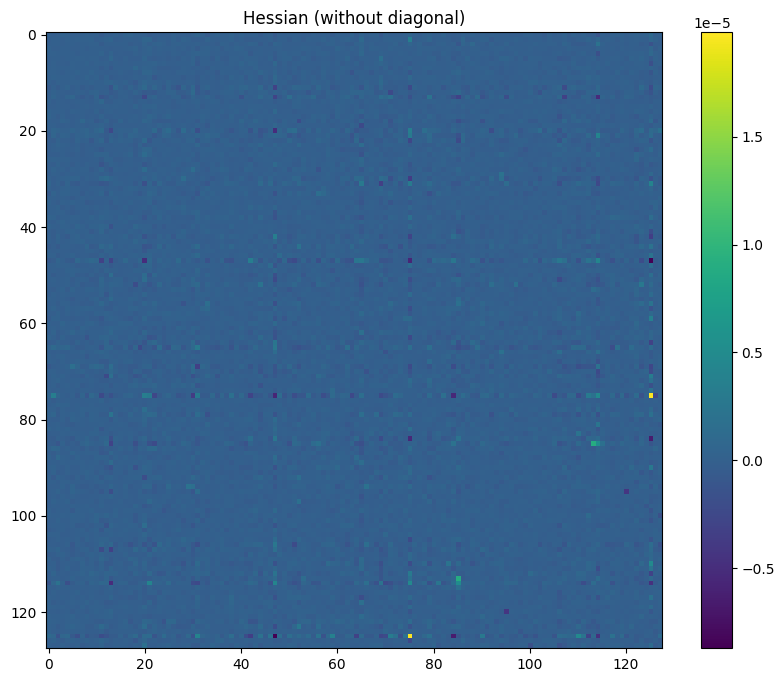

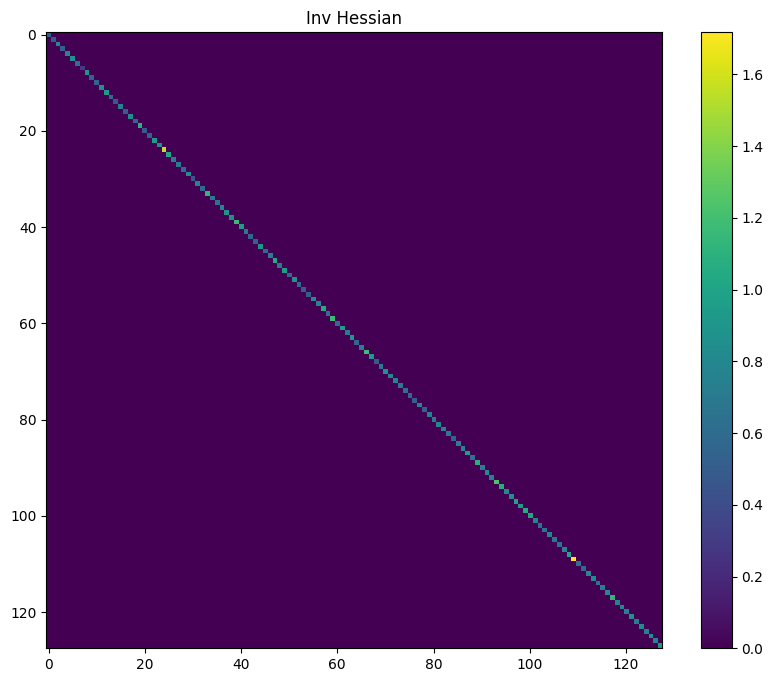

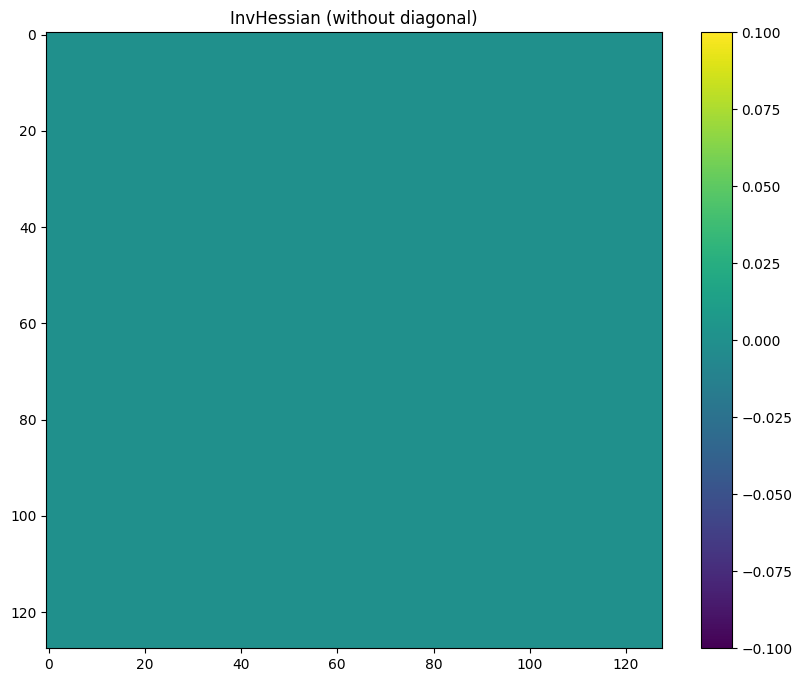

In [2]:
# plot heatmap
import matplotlib.pyplot as plt

H_sample = H[:128, :128]
I_sample = I[:128, :128]

plt.figure(figsize=(10, 8))
plt.imshow(H_sample.cpu().numpy())
plt.colorbar()
plt.title('Hessian')
plt.show()

plt.figure(figsize=(10, 8))
# sample without diagonal
mask = ~torch.eye(H_sample.shape[0], dtype=bool)
H_off_diag = H_sample[mask]
H_off_diag = H_sample.clone()
H_off_diag[~mask] = 0  # Zero out diagonal elements
plt.imshow(H_off_diag.cpu().numpy())
plt.colorbar()
plt.title('Hessian (without diagonal)')
plt.show()

plt.figure(figsize=(10, 8))
plt.imshow(I_sample.cpu().numpy())
plt.colorbar()
plt.title('Inv Hessian')
plt.show()

plt.figure(figsize=(10, 8))
# sample without diagonal
mask = ~torch.eye(I_sample.shape[0], dtype=bool)
I_off_diag = I_sample[mask]
I_off_diag = I_sample.clone()
I_off_diag[~mask] = 0  # Zero out diagonal elements
plt.imshow(I_off_diag.cpu().numpy())
plt.colorbar()
plt.title('InvHessian (without diagonal)')
plt.show()

